In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

In [2]:
data = pd.read_csv("Gecko_forces_sync_output.csv", skipinitialspace=True)
# strip whitespaces from data column names:
data.rename(columns=lambda x: x.strip(), inplace=True)
data.head()
data.columns

# add column with feet2 => FR/FL = fore; HR/HL = hind
conditions = [(data["foot"] == "FR"), (data["foot"] == "FL"), (data["foot"] == "HL"), (data["foot"] == "HR")]
values = ["fore", "fore", "hind", "hind"]
data["foot2"] = np.select(conditions, values)
data.head()

,filename,MeanX,MeanY,MeanZ,IntergralX,IntergralY,IntergralZ,MinX,MinY,MinZ,...,MaxZ,foot,direction,footfall_begin,footfall_end,individual,bodymass,SVL,TL,foot2
0,hfren11_run_01.avi,-0.000637,0.004432,-0.003940,-0.000032,0.000221,-0.000196,-0.011850,-0.000754,-0.008858,...,0.000735,FR,down,35,48,hfren11,2.75,426,447.1,fore
1,hfren11_run_02.avi,0.000730,0.001910,-0.000800,0.000061,0.000160,-0.000067,-0.005662,-0.012875,-0.004003,...,0.001513,HR,up,112,133,hfren11,2.75,426,447.1,hind
2,hfren11_run_03.avi,0.015426,0.019115,0.000864,0.000855,0.001059,0.000048,-0.000558,-0.001827,-0.003713,...,0.004661,HL,down,65,79,hfren11,2.75,426,447.1,hind
3,hfren11_run_04.avi,-0.008508,0.006227,-0.005081,-0.000231,0.000169,-0.000138,-0.039644,-0.004674,-0.023780,...,0.004473,FR,down,28,35,hfren11,2.75,426,447.1,fore
4,hfren11_run_04.avi,-0.023680,0.015558,0.002236,-0.000812,0.000534,0.000077,-0.043283,-0.002978,-0.006236,...,0.007948,HR,down,36,44,hfren11,2.75,426,447.1,hind


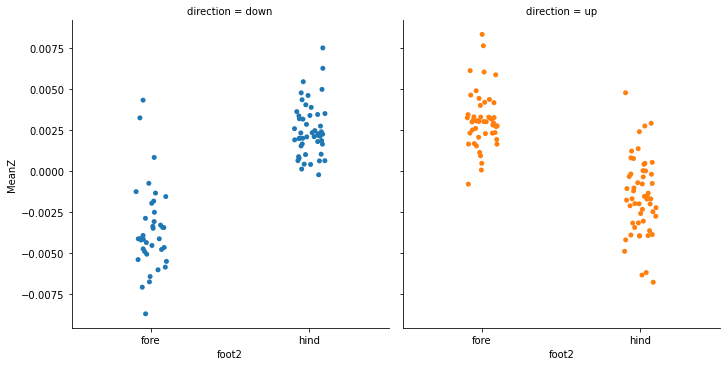

In [5]:
#set seaborn style:

# plot Fz data:
plot_Fz = sn.catplot(data=data, x="foot2", y="MeanZ", col="direction", hue="direction")
plt.savefig("Fz_up_vs_down.pdf", dpi="300")